In [ ]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Load model
model = load_model("sentiment_model.h5")

# Parameters
max_sequence_length = 100  # Should match training

# Function to predict label for single text
def predict_text(text):
    # Preprocess the input text
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_sequence_length)

    # Predict
    pred = model.predict(padded)[0][0]

    # Return label
    label = "Fake" if pred < 0.5 else "Real"
    print(f"Prediction: {label} ({pred:.4f})")
    return label, pred

# Example usage
sample_text = """ Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change.    Loretta Lynch aka Eric Holder in a skirt"""
predict_text(sample_text)


1/1 [==============================] - 1s 949ms/step
Prediction: Real (0.9998)


('Real', 0.9998104)

1/1 [==============================] - 0s 68ms/step
Fake


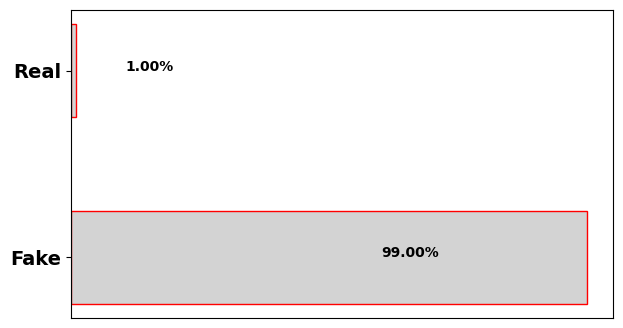

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
img_height = 128
img_width = 128
# Load the model
model = load_model("model_v1.h5")
def prediction(img):
    class_names = ['Fake', 'Real']

    my_image = load_img(img, target_size=(img_height, img_width))
    my_image = img_to_array(my_image)
    my_image = np.expand_dims(my_image, 0)

    out = np.round(model.predict(my_image)[0], 2)
    x=np.round(model.predict(my_image)[0][0], 2)
    r="Real" if x < 0.5 else "Fake"
    print(r)
    fig = plt.figure(figsize=(7, 4))
    plt.barh(class_names, out, color='lightgray',
             edgecolor='red', linewidth=1, height=0.5)

    for index, value in enumerate(out):
        plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight='bold')
    plt.xticks([])
    plt.yticks([0, 1], labels=class_names, fontweight='bold', fontsize=14)
    fig.savefig('pred_img.png', bbox_inches='tight')
    return plt.show()
# Prediction on single Image
img = 'fake1.jpg'
prediction(img)